In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pathlib

In [2]:
dataset_url = "WasteImagesDataset"
data_dir = pathlib.Path(dataset_url)

In [3]:
print(data_dir)

WasteImagesDataset


WasteImagesDataset\Aluminium\alum (115).jpg


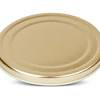

In [4]:
electronic = list(data_dir.glob('Aluminium/*'))
print(electronic[18])
PIL.Image.open(str(electronic[18]))

In [5]:
img_height, img_width = 224, 224
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 5078 files belonging to 9 classes.
Using 4063 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 5078 files belonging to 9 classes.
Using 1015 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Other Plastics', 'Paper and Cardboard', 'Plastic', 'Textiles', 'Wood']


In [8]:
vgg_model = Sequential()

pretrained_model = tf.keras.applications.VGG19(
    include_top = False,
    input_shape = (224, 224, 3),
    pooling = 'avg',
    classes = 9,
    weights = 'imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable = False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation = 'relu'))
vgg_model.add(Dense(9, activation = 'softmax'))

In [9]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 20,291,657
Trainable params: 267,273
Non-trainable params: 20,024,384
_________________________________________________________________


In [10]:
vgg_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
epochs = 10
history = vgg_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
127/127 [==============================] - 74s 489ms/step - loss: 1.1733 - accuracy: 0.7366 - val_loss: 0.7073 - val_accuracy: 0.7990
Epoch 2/10
127/127 [==============================] - 47s 366ms/step - loss: 0.3273 - accuracy: 0.8912 - val_loss: 0.6949 - val_accuracy: 0.8207
Epoch 3/10
127/127 [==============================] - 47s 365ms/step - loss: 0.1575 - accuracy: 0.9419 - val_loss: 0.6790 - val_accuracy: 0.8384
Epoch 4/10
127/127 [==============================] - 47s 366ms/step - loss: 0.0823 - accuracy: 0.9732 - val_loss: 0.6769 - val_accuracy: 0.8443
Epoch 5/10
127/127 [==============================] - 47s 365ms/step - loss: 0.0457 - accuracy: 0.9889 - val_loss: 0.6209 - val_accuracy: 0.8640
Epoch 6/10
127/127 [==============================] - 47s 365ms/step - loss: 0.0319 - accuracy: 0.9946 - val_loss: 0.6345 - val_accuracy: 0.8591
Epoch 7/10
127/127 [==============================] - 47s 366ms/step - loss: 0.0174 - accuracy: 0.9975 - val_loss: 0.6434 - val_ac

In [12]:
import h5py

vgg_model.save('vgg19_history_10.h5')

with h5py.File('vgg19_history_10.h5', 'a') as hf:
    for key in history.history.keys():
        hf.create_dataset(key, data=history.history[key])